In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from cache_to_disk import delete_disk_caches_for_function

from mah import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
nsim0 = 17417
simname = "csiborg2_main"
min_logmass = 12.25
delete_cache = False

# NOTE: These can possibly be pickled to avoid doing this long process every
# single time.

if delete_cache:
    delete_disk_caches_for_function("load_data")
cat0, catxs, merger_trees, overlaps = load_data(nsim0, simname, min_logmass)
nsimxs = [cat.nsim for cat in catxs]

2024-04-04 16:35:54.825645: loading 20 halo catalogues.
2024-04-04 16:35:54.826427: loading 20 merger trees.


Loading overlap objects: 100%|██████████| 19/19 [01:52<00:00,  5.90s/it]


In [106]:
data = extract_main_progenitor_maxoverlap(2, overlaps, merger_trees)

Cross main progenitors:   0%|          | 0/19 [00:00<?, ?it/s]

Cross main progenitors: 100%|██████████| 19/19 [00:02<00:00,  7.82it/s]


Appending main progenitor for 17417.


In [107]:
age, mah = summarize_extracted_mah(simname, data, nsim0, nsimxs, "MainProgenitorMass")

In [115]:
xrange, random_mah = extract_random_mah("csiborg2_random", [15.05, 15.10], "MainProgenitorMass")

/tmp/ipykernel_3803914/2462306326.py:5: RuntimeWarning: All-NaN slice encountered
  mu = np.nanmedian(random_mah, axis=0)
/mnt/users/rstiskalek/csiborgtools/venv_csiborg/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/tmp/ipykernel_3803914/2462306326.py:11: RuntimeWarning: All-NaN slice encountered
  mu = np.nanmedian(mah, axis=0)


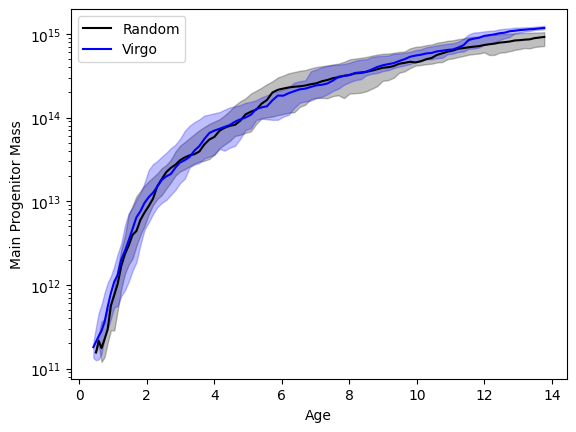

In [116]:
plt.figure()
# # for i in range(len(random_mah)):
#     # plt.plot(xrange, random_mah[i], alpha=0.1, color="black")

mu = np.nanmedian(random_mah, axis=0)
ymin = np.nanpercentile(random_mah, 16, axis=0)
ymax = np.nanpercentile(random_mah, 84, axis=0)
plt.plot(xrange, mu, color="black", label="Random")
plt.fill_between(xrange, ymin, ymax, color="black", alpha=0.25)

mu = np.nanmedian(mah, axis=0)
ymin = np.nanpercentile(mah, 16, axis=0)
ymax = np.nanpercentile(mah, 84, axis=0)
plt.plot(age, mu, color="blue", label="Virgo")
plt.fill_between(age, ymin, ymax, color="blue", alpha=0.25)

plt.legend()

plt.xlabel("Age")
plt.ylabel("Main Progenitor Mass")

plt.yscale("log")
# plt.savefig("../../plots/virgo_new.png")
plt.show()

/tmp/ipykernel_3803914/1215582327.py:31: RuntimeWarning: All-NaN slice encountered
  mu = np.nanmedian(random_mah, axis=0)


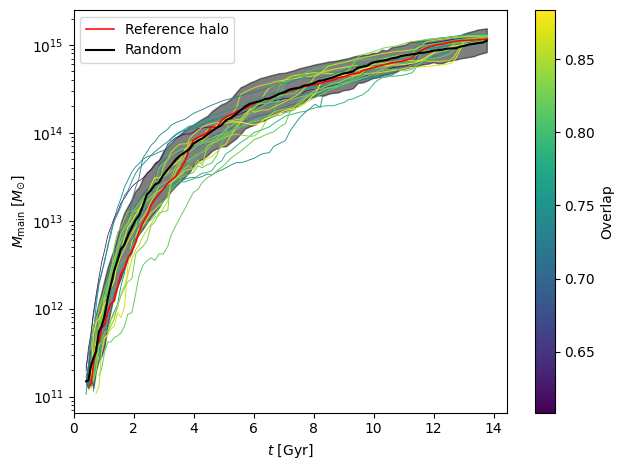

In [79]:

cmap = plt.cm.viridis

x = np.asarray([data[nsimx]["Overlap"] for nsimx in nsimxs if nsimx in data])
w = x - x.min()
w /= w.max()

norm = Normalize(vmin=x.min(), vmax=x.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(x)


fig, ax = plt.subplots()
lw = plt.rcParams["lines.linewidth"] / 2
d = data[nsim0]
ax.plot(d["Age"], d["MainProgenitorMass"], color="red", lw=1.5*lw,
        label="Reference halo", zorder=1)

i = 0
for nsimx in nsimxs:
    try:
        d = data[nsimx]
    except KeyError:
        continue

    ax.plot(d["Age"], d["MainProgenitorMass"], color=cmap(norm(x[i])),
            zorder=0, lw=lw * (x[i] / x.max()))

    i += 1


mu = np.nanmedian(random_mah, axis=0)
ymin = np.nanpercentile(random_mah, 16, axis=0)
ymax = np.nanpercentile(random_mah, 84, axis=0)
ax.plot(xrange, mu, color="black", label="Random")
ax.fill_between(xrange, ymin, ymax, color="black", alpha=0.5, zorder=-1)

cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Overlap')

ax.legend()
ax.set_yscale("log")
ax.set_xlabel(r"$t ~ [\mathrm{Gyr}]$")
ax.set_ylabel(r"$M_{\rm main} ~ [M_{\odot}]$")
ax.set_xlim(0)
plt.tight_layout()
# plt.savefig("../../plots/example_mah.png")
fig.show()

In [136]:
nsim0 = 1
simname = "csiborg2_random"
kind = simname.split("_")[-1]
min_logmass = 12.25

# NOTE: These can possibly be pickled to avoid doing this long process every
# single time.

cat = csiborgtools.read.CSiBORG2Catalogue(
    nsim0, 99, kind, bounds={"totmass": (1e13, None), "dist": (0, 135)})
# merger_reader = csiborgtools.read.CSiBORG2MergerTreeReader(nsim0, kind)

In [149]:
a = np.array([0.01428571, 0.02424242, 0.03419913, 0.04415584, 0.05411255,
       0.06406926, 0.07402597, 0.08398268, 0.09393939, 0.1038961 ,
       0.11385281, 0.12380952, 0.13376623, 0.14372294, 0.15367965,
       0.16363636, 0.17359307, 0.18354978, 0.19350649, 0.2034632 ,
       0.21341991, 0.22337662, 0.23333333, 0.24329004, 0.25324675,
       0.26320346, 0.27316017, 0.28311688, 0.29307359, 0.3030303 ,
       0.31298701, 0.32294372, 0.33290043, 0.34285714, 0.35281385,
       0.36277056, 0.37272727, 0.38268398, 0.39264069, 0.4025974 ,
       0.41255411, 0.42251082, 0.43246753, 0.44242424, 0.45238095,
       0.46233766, 0.47229437, 0.48225108, 0.49220779, 0.5021645 ,
       0.51212121, 0.52207792, 0.53203463, 0.54199134, 0.55194805,
       0.56190476, 0.57186147, 0.58181818, 0.59177489, 0.6017316 ,
       0.61168831, 0.62164502, 0.63160173, 0.64155844, 0.65151515,
       0.66147186, 0.67142857, 0.68138528, 0.69134199, 0.7012987 ,
       0.71125541, 0.72121212, 0.73116883, 0.74112554, 0.75108225,
       0.76103896, 0.77099567, 0.78095238, 0.79090909, 0.8008658 ,
       0.81082251, 0.82077922, 0.83073593, 0.84069264, 0.85064935,
       0.86060606, 0.87056277, 0.88051948, 0.89047619, 0.9004329 ,
       0.91038961, 0.92034632, 0.93030303, 0.94025974, 0.95021645,
       0.96017316, 0.97012987, 0.98008658, 0.99004329, 1.        ])

In [155]:
from h5py import File

In [156]:
f = File("/mnt/extraspace/rstiskalek/csiborg_postprocessing/random_mah/random_mah_csiborg2_random_1.hdf5")

In [168]:
f["MainProgenitorMass"][0]

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan, 9.6507642e+10, 3.0197550e+11, 3.2376760e+11,
       7.0668498e+11, 7.7206113e+11, 9.3394495e+11, 1.5814801e+12,
       1.9799633e+12, 2.8672110e+12, 3.4369173e+12, 4.2152047e+12,
       4.0595470e+12, 6.7960056e+12, 8.0506048e+12, 9.8562317e+12,
       1.5811687e+13, 2.1929025e+13, 2.7361473e+13, 3.6311776e+13,
       4.0548774e+13, 4.6049712e+13, 5.1784131e+13, 5.8592594e+13,
       6.2322144e+13, 6.8669858e+13, 7.1316036e+13, 1.2149067e+14,
       1.4343837e+14, 1.5714247e+14, 1.6746878e+14, 1.8382215e+14,
       1.8707539e+14, 1.8938536e+14, 1.9296859e+14, 1.9942214e+14,
       2.0502892e+14, 2.0806736e+14, 2.1257209e+14, 2.3088363e+14,
       2.4707200e+14, 2.5878680e+14, 2.6422236e+14, 2.7754664e+14,
       2.8651874e+14, 2.9785370e+14, 3.0968989e+14, 3.1373079e

In [154]:
print(list(1 / a - 1))

[69.0000210000063, 40.250007218751264, 28.24050991940438, 21.6470609550175, 17.480001404480106, 14.608109099433955, 12.508772664512199, 10.90721705951751, 9.64516173673259, 8.625000360937513, 7.7832702592057235, 7.0769233254437935, 6.475728365821477, 5.95783150553419, 5.50704240932355, 5.111111246913583, 4.760598622974984, 4.448113312911626, 4.1677853285437605, 3.914893700679041, 3.685598452365574, 3.476744253718227, 3.285714346938776, 3.1103203402819117, 2.9487179993425383, 2.7993421515051513, 2.6608558268213116, 2.5321101306287352, 2.4121122957547967, 2.3000000330000008, 2.1950207773798662, 2.096514773533915, 2.003901196522936, 1.9166666909722223, 1.8343558508261513, 1.7565632668759008, 1.6829268488994646, 1.613122190273029, 1.5468577900064306, 1.4838709837669097, 1.4239244641145379, 1.366803292753544, 1.3123123255056859, 1.2602739849878026, 1.210526327423823, 1.162921359250726, 1.117323566656109, 1.0736086272735772, 1.0316622782422846, 0.9913793189283591, 0.9526627299814432, 0.91542

In [142]:
np.sum(cat["totmass"] > 5e14)

17

In [130]:
d1 = merger_reader.main_progenitor(10000)


In [132]:
d1["SnapNum"]

array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83,
       82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66,
       65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49,
       48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32,
       31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17],
      dtype=int32)

In [127]:
np.sum(cat["totmass"] > 1e13)

8156

In [128]:
250e-3 * 8000 / 60

33.333333333333336

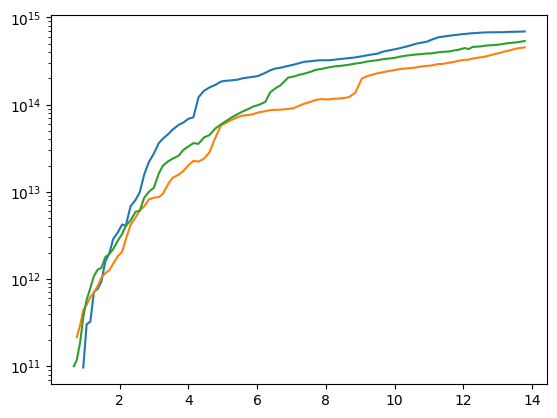

In [116]:
plt.figure()
plt.plot(d1["Age"], d1["MainProgenitorMass"])
plt.plot(d2["Age"], d2["MainProgenitorMass"])
plt.plot(d3["Age"], d3["MainProgenitorMass"])
plt.yscale("log")


plt.show()

In [110]:
cat["totmass"]

array([1.4623428e+15, 7.4588315e+14, 7.1264091e+14, ..., 9.9620782e+10,
       9.9620782e+10, 9.9620782e+10], dtype=float32)